In [1]:
import pandas_datareader.data as web
from datetime import datetime, timedelta
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
from arch import arch_model

In [2]:
df = pd.read_csv('Yamaha.csv', delimiter=';')
print(df)
print(df.dtypes)

            Date    Price     Open     High      Low     Volume    Change
0     04/01/2018  4320,00  4210,00  4320,00  4205,00  1160000,0   0,03850
1     05/01/2018  4380,00  4340,00  4385,00  4315,00   942600,0   0,01390
2     09/01/2018  4465,00  4415,00  4470,00  4375,00   968700,0   0,01940
3     10/01/2018  4520,00  4470,00  4530,00  4465,00   764000,0   0,01230
4     11/01/2018  4540,00  4525,00  4545,00  4515,00   796800,0   0,00440
...          ...      ...      ...      ...      ...        ...       ...
1447  08/12/2023  3216,00  3271,00  3271,00  3199,00  1440000,0  -0,01680
1448  11/12/2023  3216,00  3259,00  3269,00  3213,00   944400,0   0,00000
1449  12/12/2023  3176,00  3269,00  3271,00  3174,00   991400,0  -0,01240
1450  13/12/2023  3218,00  3190,00  3230,00  3190,00  1040000,0   0,01320
1451  14/12/2023  3142,00  3205,00  3205,00  3133,00  1110000,0  -0,02360

[1452 rows x 7 columns]
Date      object
Price     object
Open      object
High      object
Low       object
Vo

In [3]:
df['Price'] = df['Price'].str.replace(',', '.').astype(float)
df['Open'] = df['Open'].str.replace(',', '.').astype(float)
df['High'] = df['High'].str.replace(',', '.').astype(float)
df['Low'] = df['Low'].str.replace(',', '.').astype(float)
df['Volume'] = df['Volume'].str.replace(',', '.').astype(float)
df['Change'] = df['Change'].str.replace(',', '.').astype(float)

print(df)
df.describe()

            Date   Price    Open    High     Low     Volume  Change
0     04/01/2018  4320.0  4210.0  4320.0  4205.0  1160000.0  0.0385
1     05/01/2018  4380.0  4340.0  4385.0  4315.0   942600.0  0.0139
2     09/01/2018  4465.0  4415.0  4470.0  4375.0   968700.0  0.0194
3     10/01/2018  4520.0  4470.0  4530.0  4465.0   764000.0  0.0123
4     11/01/2018  4540.0  4525.0  4545.0  4515.0   796800.0  0.0044
...          ...     ...     ...     ...     ...        ...     ...
1447  08/12/2023  3216.0  3271.0  3271.0  3199.0  1440000.0 -0.0168
1448  11/12/2023  3216.0  3259.0  3269.0  3213.0   944400.0  0.0000
1449  12/12/2023  3176.0  3269.0  3271.0  3174.0   991400.0 -0.0124
1450  13/12/2023  3218.0  3190.0  3230.0  3190.0  1040000.0  0.0132
1451  14/12/2023  3142.0  3205.0  3205.0  3133.0  1110000.0 -0.0236

[1452 rows x 7 columns]


,Price,Open,High,Low,Volume,Change
count,1452.000000,1452.000000,1452.000000,1452.000000,1.452000e+03,1452.000000
mean,5342.451102,5344.658402,5400.580579,5283.276171,6.088632e+05,0.000012
std,695.721143,694.041663,698.877570,688.962765,3.185040e+05,0.020299
min,3142.000000,3190.000000,3205.000000,3133.000000,1.144000e+05,-0.145700
25%,4938.750000,4940.000000,4990.000000,4890.000000,4.071750e+05,-0.011325
50%,5315.000000,5320.000000,5370.000000,5260.000000,5.324000e+05,0.000000
75%,5770.000000,5790.000000,5840.000000,5720.000000,7.116750e+05,0.010700
max,7440.000000,7450.000000,7490.000000,7360.000000,3.140000e+06,0.126700


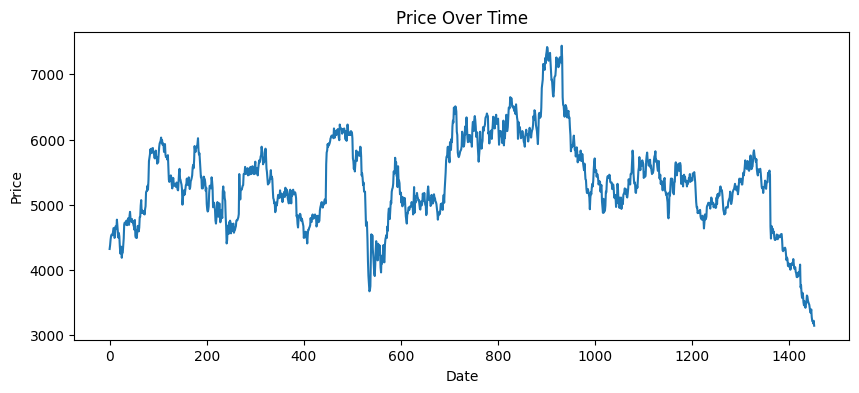

In [4]:
# Assuming you have a DataFrame 'df' with a 'Price' column
plt.figure(figsize=(10, 4))
plt.plot(df['Price'])
plt.title('Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [5]:
returns = 100 * df.Price.pct_change().dropna()
returns

1       1.388889
2       1.940639
3       1.231803
4       0.442478
5       0.000000
          ...   
1447   -1.681443
1448    0.000000
1449   -1.243781
1450    1.322418
1451   -2.361715
Name: Price, Length: 1451, dtype: float64

In [6]:
#Split data into train, test sets with a ratio of 6:4
train_size = int(0.7 * len(returns))
test_size =len(returns) - train_size

train_data = returns[:train_size]

#Training process
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data)

In [7]:
model = arch_model(y_train, p=1, q=5)
model_fit = model.fit()
model_fit.summary()

Iteration:      1,   Func. Count:     10,   Neg. LLF: 2351180701.428502
Iteration:      2,   Func. Count:     22,   Neg. LLF: 3744.9549557128776
Iteration:      3,   Func. Count:     34,   Neg. LLF: 2204.977030805889
Iteration:      4,   Func. Count:     45,   Neg. LLF: 2196.3074562315014
Iteration:      5,   Func. Count:     56,   Neg. LLF: 2160.3272834752106
Iteration:      6,   Func. Count:     65,   Neg. LLF: 2159.1868743769546
Iteration:      7,   Func. Count:     75,   Neg. LLF: 2157.491370357871
Iteration:      8,   Func. Count:     85,   Neg. LLF: 2156.992747365237
Iteration:      9,   Func. Count:     94,   Neg. LLF: 2156.9655247414853
Iteration:     10,   Func. Count:    103,   Neg. LLF: 2156.9605288247385
Iteration:     11,   Func. Count:    112,   Neg. LLF: 2156.9584007204317
Iteration:     12,   Func. Count:    121,   Neg. LLF: 2156.9581846157116
Iteration:     13,   Func. Count:    130,   Neg. LLF: 2156.958165674055
Iteration:     14,   Func. Count:    139,   Neg. LLF: 21

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/arch/univariate/base.py:1890: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if isinstance(table_val[pos], (np.float64, float)):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/arch/univariate/base.py:1891: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  assert isinstance(table_val[pos], float)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/arch/univariate/base.py:1892: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -2156.96
Distribution:                  Normal   AIC:                           4329.92
Method:            Maximum Likelihood   BIC:                           4369.30
                                        No. Observations:                 1015
Date:                Sun, Dec 31 2023   Df Residuals:                     1014
Time:                        18:46:56   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.0409  6.015e-02      0.681      0.496 [-7.694e-02,  0.159]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.6069      0.469      1.295      0.195   [ -0.312,  1.525]
alpha[1]       0.1572  5.514e-02      2.852  4.350e-03 [4.917e-02,  0.265]
beta[1]    2.7033e-13      0.657  4.117e-13      1.000   [ -1.287,  1.287]
beta[2]        0.1564      0.388      0.403      0.687   [ -0.604,  0.917]
beta[3]        0.0000      0.625      0.000      1.000   [ -1.225,  1.225]
beta[4]    1.5282e-13      0.523  2.921e-13      1.000   [ -1.026,  1.026]
beta[5]        0.5510      0.114      4.819  1.445e-06   [  0.327,  0.775]
==========================================================================

Covariance estimator: robust
"""

In [8]:
#Find the best model from train
# Assuming 'returns' is your time series data

best_aic = np.inf
best_p, best_q = None, None

# Iterate through different combinations of p and q
max_p, max_q = 5, 5
for p in range(1, max_p + 1):
    for q in range(1, max_q + 1):
        model = arch_model(y_train, vol='Garch', p=p, q=q)
        model_fit = model.fit(disp='off')

        # Calculate AIC for the current model
        aic = model_fit.aic

        # Update the best model parameters if the current model has a lower AIC
        if aic < best_aic:
            best_aic = aic
            best_p, best_q = p, q

# Fit the best model to the entire dataset
final_model_fit = arch_model(y_train, vol='Garch', p=best_p, q=best_q).fit(disp='off')


# Display the best model's parameters and AIC
print("Best Model Parameters: p={}, q={}".format(best_p, best_q))
print("AIC of the Best Model: {}".format(best_aic))


Best Model Parameters: p=1, q=5
AIC of the Best Model: 4329.91632883701


In [9]:
rolling_predictions = []

for i in range(test_size):
    train = returns[:-(test_size-i)]
    model = arch_model(train, p=best_p, q=best_q)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

In [10]:
rolling_predictions = pd.Series(rolling_predictions, index=returns.index[-test_size:])

In [11]:
forecasted_next_30_days = []
for i in range(30):
    train = returns[:-(test_size+i)]
    model = arch_model(train, p=best_p, q=best_q)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    forecasted_next_30_days.append(np.sqrt(pred.variance.values[-1:][0]))

In [12]:
# 7. Evaluate the accuracy of testing
test_actual_values = returns[-test_size:]
test_predicted_values = rolling_predictions[returns.index[-test_size:]]
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
# Calculate RMSE
test_rmse = np.sqrt(MSE(test_actual_values, test_predicted_values))
# Calculate MAPE for non-zero actual values
non_zero_mask = test_actual_values != 0
test_mape = np.mean(np.abs((test_actual_values[non_zero_mask] - test_predicted_values[non_zero_mask]) / test_actual_values[non_zero_mask])) * 100
# Calculate MAE
test_mae = MAE(test_actual_values, test_predicted_values)

def huber_loss(y_true, y_pred, delta=1.0):
    error = y_true - y_pred
    condition = np.abs(error) < delta
    squared_loss = 0.5 * (error**2)
    linear_loss = delta * (np.abs(error) - 0.5 * delta)
    return np.where(condition, squared_loss, linear_loss)

# Calculate Huber Loss
test_huber_loss = np.mean(huber_loss(test_actual_values, test_predicted_values, delta=1.0))

# Print
print('Testing RMSE:', test_rmse)
print('Testing MAPE:', test_mape)
print('Testing MAE:', test_mae)
print('Testing Huber Loss:', test_huber_loss)

Testing RMSE: 2.7098634834506807
Testing MAPE: 385.2716721953356
Testing MAE: 2.1807687412215504
Testing Huber Loss: 1.7162695338663911


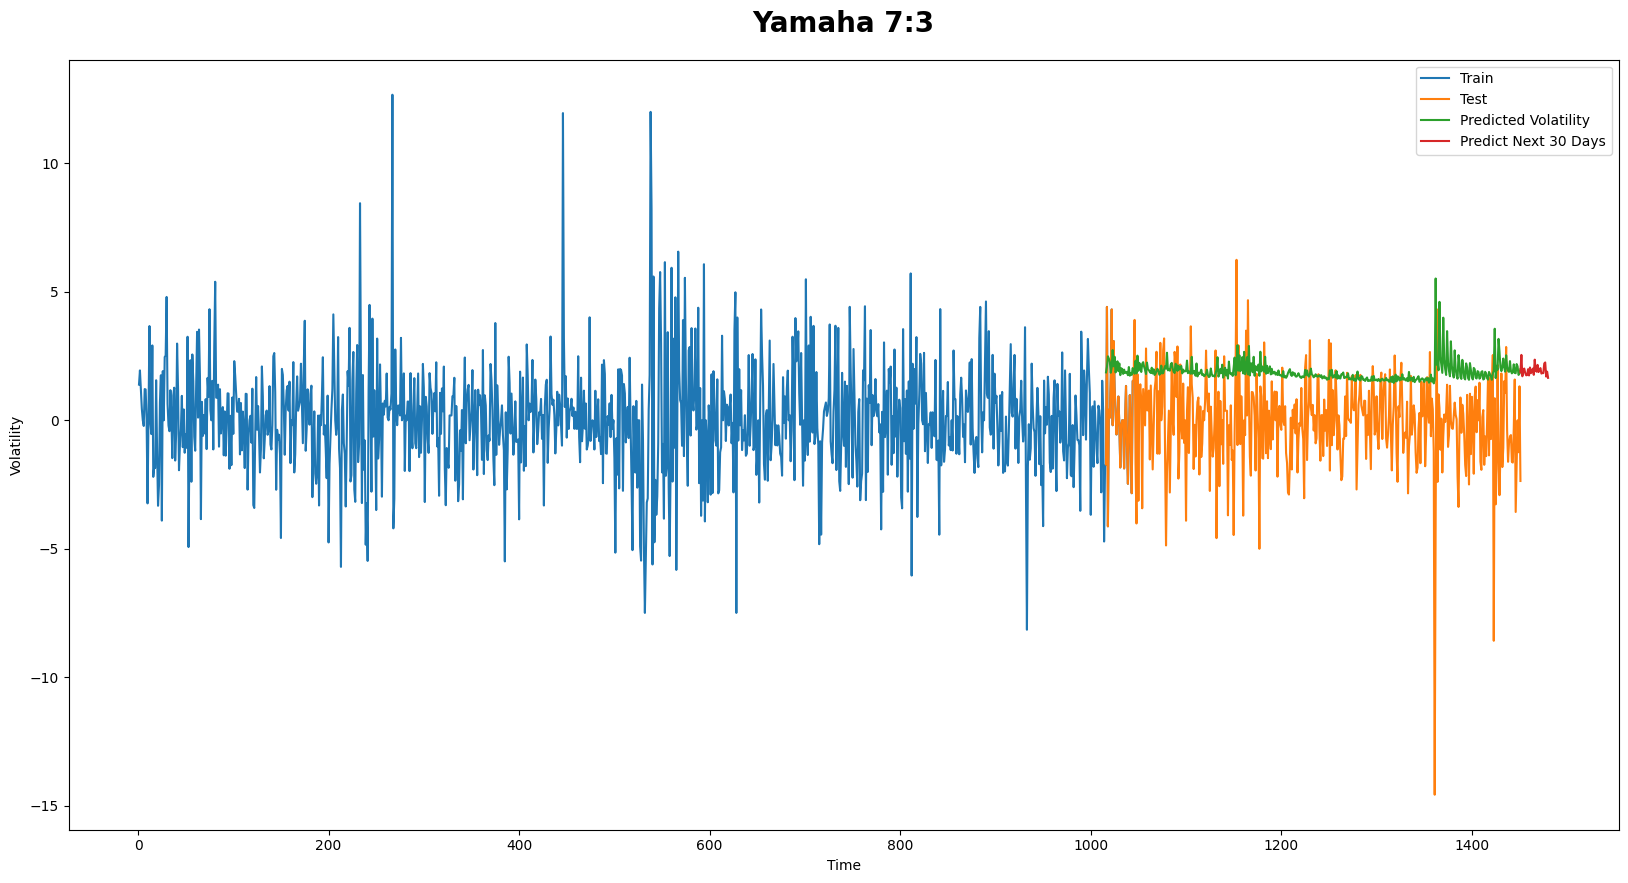

In [13]:
# Lấy index từ ngày tiếp theo trở đi
index_forecasted = range(len(returns), len(returns)+ len(forecasted_next_30_days))

# Plot biểu đồ với index được điều chỉnh
plt.figure(figsize=(20,10 ))
train, = plt.plot(returns[:-(test_size - i)])
test, = plt.plot(returns[-test_size:])
preds, = plt.plot(rolling_predictions)
forecast, = plt.plot(index_forecasted, forecasted_next_30_days)


plt.legend(['Train', 'Test', 'Predicted Volatility', 'Predict Next 30 Days'], fontsize=10)
plt.title('Yamaha 7:3', fontweight='bold', fontsize=20, pad=20)
plt.xlabel('Time')
plt.ylabel('Volatility')


# Show the plot
plt.show()